# Part III - Registered Voter Participation in Union County, NC

## Model and Interpret Trends in Voter Participation for 2020, 2016, and 2012 General Elections

<font size=3rem>
    
- **[OBTAIN](#OBTAIN)**<br>
- **[MODEL](#MODEL)**<br>
- **[INTERPRET](#INTERPRET)**<br>
- **[Conclusions/Recommendations](#Conclusions/Recommendations)<br>**
</font>

# OBTAIN

In [1]:
## Import Numpy and set random seed for notebook
import numpy as np
np.random.seed(319)

## Import functions made specifically for this project
from capstone_functions import *
import plotly_year_functions as pyy

## Import remaining necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import plotly.express as px

In [2]:
## Set options for displaying Pandas DataFrames
pd.options.display.max_columns = 50
pd.options.display.max_rows = 100

In [3]:
## Whether or not to display all plotly figures
show_plotly = False

## Obtain 2020 Election

In [4]:
## Import and preview dataset
elec_2020_df = pd.read_csv('Data/UC_gen_2020_clean.gz',
                     dtype={'precinct_abbrv': str, 
                            'vtd_abbrv': str
                             })
elec_2020_df.head()

,ncid,no_vote_his,birth_age_adj,voting_method,Gen_2020,vote_early,vote_by_mail,vote_curbside,Pri_2020,party_cd,gender_code,birth_year,registr_dt,race_code,ethnic_code,zip_code,res_street_address,res_city_desc,birth_state,drivers_lic,precinct_abbrv,vtd_abbrv,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,drivers_lic_bin,vote_cat,Gen_2020_binary,Pri_2020_binary,party_grp,race_grp,city_grp,birth_reg_other,generation,gen_grp
0,AA100547,0,65.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,Election Day,REP,M,1955,2014-03-31,W,UN,28079.0,5514 BEVERLY DR,INDIAN TRAIL,NC,Y,016,016,9.0,20B,20C,35.0,69.0,4.0,1,Early,1,1,Rep,White,Indian Trail,South,Boomer,Boomer
1,AA108801,0,57.0,No Vote,No Vote,0.0,0.0,0.0,No Vote,UNA,M,1963,2016-11-04,W,NL,28173.0,4221 OXFORD MILL RD,WAXHAW,MA,Y,020B,020B,9.0,20B,20C,35.0,68.0,6.0,1,No Vote,0,0,Other,White,Waxhaw,Northeast,Boomer,Boomer
2,AA109481,0,47.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,No Vote,DEM,F,1973,2020-03-19,W,NL,28173.0,1013 LYDNEY CIR,WAXHAW,MN,Y,020A,020A,9.0,20B,20C,35.0,68.0,2.0,1,Early,1,0,Dem,White,Waxhaw,Midwest,GenX,GenX
3,AA112504,0,72.0,No Vote,No Vote,0.0,0.0,0.0,No Vote,REP,F,1948,2012-10-26,W,NL,28112.0,4325 WOLF POND RD,MONROE,NY,Y,024,024,9.0,20B,20C,35.0,55.0,2.0,1,No Vote,0,0,Rep,White,Monroe,Northeast,Boomer,Boomer
4,AA114763,0,53.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,Election Day,DEM,F,1967,2012-08-13,B,UN,28104.0,4002 LAWRENCE DANIEL DR,MATTHEWS,NC,Y,037A,037A,9.0,20B,20C,35.0,69.0,5.0,1,Early,1,1,Dem,Black,Matthews,South,GenX,GenX


## Obtain 2016 Election

In [5]:
## Import and preview dataset
elec_2016_df = pd.read_csv('Data/UC_gen_2016_clean.gz',
                     dtype={'precinct_abbrv': str, 
                            'vtd_abbrv': str
                             })
elec_2016_df.head()

,ncid,no_vote_his,birth_age_adj,voting_method,Gen_2016,vote_early,vote_by_mail,vote_curbside,Pri_2016,party_cd,gender_code,birth_year,registr_dt,race_code,ethnic_code,zip_code,res_street_address,res_city_desc,birth_state,drivers_lic,precinct_abbrv,vtd_abbrv,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,drivers_lic_bin,vote_cat,Gen_2016_binary,Pri_2016_binary,party_grp,race_grp,city_grp,birth_reg_other,generation,gen_grp
0,AA100547,0,61.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,No Vote,REP,M,1955,2014-03-31,W,UN,28079.0,5514 BEVERLY DR,INDIAN TRAIL,NC,Y,016,016,9.0,20B,20C,35.0,69.0,4.0,1,Early,1,0,Rep,White,Indian Trail,South,Boomer,Boomer
1,AA108801,0,53.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,No Vote,UNA,M,1963,2016-11-04,W,NL,28173.0,4221 OXFORD MILL RD,WAXHAW,MA,Y,020B,020B,9.0,20B,20C,35.0,68.0,6.0,1,Early,1,0,Other,White,Waxhaw,Northeast,Boomer,Boomer
2,AA112504,0,68.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,No Vote,REP,F,1948,2012-10-26,W,NL,28112.0,4325 WOLF POND RD,MONROE,NY,Y,024,024,9.0,20B,20C,35.0,55.0,2.0,1,Early,1,0,Rep,White,Monroe,Northeast,Boomer,Boomer
3,AA114763,0,49.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,Election Day,DEM,F,1967,2012-08-13,B,UN,28104.0,4002 LAWRENCE DANIEL DR,MATTHEWS,NC,Y,037A,037A,9.0,20B,20C,35.0,69.0,5.0,1,Early,1,1,Dem,Black,Matthews,South,GenX,GenX
4,AA118202,0,44.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,No Vote,DEM,M,1972,2006-04-12,W,UN,28079.0,7006 CONIFER CIR,INDIAN TRAIL,CT,Y,038B,038B,9.0,20B,20C,35.0,69.0,4.0,1,Early,1,0,Dem,White,Indian Trail,Northeast,GenX,GenX


## Obtain 2012 Election

In [6]:
## Import and preview dataset
elec_2012_df = pd.read_csv('Data/UC_gen_2012_clean.gz',
                     dtype={'precinct_abbrv': str, 
                            'vtd_abbrv': str
                             })
elec_2012_df.head()

,ncid,no_vote_his,birth_age_adj,voting_method,Gen_2012,vote_early,vote_by_mail,vote_curbside,Pri_2012,party_cd,gender_code,birth_year,registr_dt,race_code,ethnic_code,zip_code,res_street_address,res_city_desc,birth_state,drivers_lic,precinct_abbrv,vtd_abbrv,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,drivers_lic_bin,vote_cat,Gen_2012_binary,Pri_2012_binary,party_grp,race_grp,city_grp,birth_reg_other,generation,gen_grp
0,AA109481,0,39.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,Election Day,DEM,F,1973,2020-03-19,W,NL,28173.0,1013 LYDNEY CIR,WAXHAW,MN,Y,020A,020A,9.0,20B,20C,35.0,68.0,2.0,1,Early,1,1,Dem,White,Waxhaw,Midwest,GenX,GenX
1,AA112504,0,64.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,No Vote,REP,F,1948,2012-10-26,W,NL,28112.0,4325 WOLF POND RD,MONROE,NY,Y,024,024,9.0,20B,20C,35.0,55.0,2.0,1,Early,1,0,Rep,White,Monroe,Northeast,Boomer,Boomer
2,AA114763,0,45.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,No Vote,DEM,F,1967,2012-08-13,B,UN,28104.0,4002 LAWRENCE DANIEL DR,MATTHEWS,NC,Y,037A,037A,9.0,20B,20C,35.0,69.0,5.0,1,Early,1,0,Dem,Black,Matthews,South,GenX,GenX
3,AA116927,0,50.0,IN-PERSON,Election Day,0.0,0.0,0.0,Election Day,REP,M,1962,2018-08-06,W,NL,28173.0,3513 MCPHERSON ST,WAXHAW,NY,Y,028D,028,9.0,20B,20C,35.0,68.0,6.0,1,Election Day,1,1,Rep,White,Waxhaw,Northeast,Boomer,Boomer
4,AA118202,0,40.0,IN-PERSON,Election Day,0.0,0.0,0.0,No Vote,DEM,M,1972,2006-04-12,W,UN,28079.0,7006 CONIFER CIR,INDIAN TRAIL,CT,Y,038B,038B,9.0,20B,20C,35.0,69.0,4.0,1,Election Day,1,0,Dem,White,Indian Trail,Northeast,GenX,GenX


# MODEL

In [7]:
## Import necessary functions/methods/classes for modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve

## Import classes necessary for building preprocessing pipelines
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

## Import necessary libraries for SNOTE
import six
import sys
sys.modules['sklearn.externals.six'] = six
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline

## Model 2020 Election

### 2020 Binary Target - Vote vs. No Vote

#### 2020 Prepare DataFrame for Modeling - Train Test Split and Preprocessing

In [8]:
## Create new DataFrame from the full cleaned df that only consists of 
  ## the target ('Gen_2020') and desired predictors
model_2020_df = elec_2020_df.copy()
model_2020_df = model_2020_df[['Gen_2020', 'Gen_2020_binary', 'gen_grp', 'party_grp',
                     'race_grp', 'gender_code', 'birth_reg_other',
                     'drivers_lic', 'city_grp']]

## Drop the 'Other' voting method so train-test-splits constant across
## binary and multiclass target models
  ## 'Other' represents provisional and transfer ballots. This type of
    ## vote is not so much generated by a voter's choice as it is by the 
    ## legal process of how votes may be cast.
model_2020_df = model_2020_df.drop(model_2020_df.loc[model_2020_df['Gen_2020']=='Other'].index)

## Inspect the resulting df
display(model_2020_df.head())
len(model_2020_df)

,Gen_2020,Gen_2020_binary,gen_grp,party_grp,race_grp,gender_code,birth_reg_other,drivers_lic,city_grp
0,Early,1,Boomer,Rep,White,M,South,Y,Indian Trail
1,No Vote,0,Boomer,Other,White,M,Northeast,Y,Waxhaw
2,Early,1,GenX,Dem,White,F,Midwest,Y,Waxhaw
3,No Vote,0,Boomer,Rep,White,F,Northeast,Y,Monroe
4,Early,1,GenX,Dem,Black,F,South,Y,Matthews


167337

In [9]:
## Check class imbalance
check_unique('Gen_2020_binary', model_2020_df)

,count,%
1,130750,78.14
0,36587,21.86


In [10]:
## Define target variable
bin_2020_target = 'Gen_2020_binary'

## Separate features (X) and target (y) for train-test-split
X_2020 = model_2020_df.drop(columns=[bin_2020_target, 'Gen_2020'], axis=1).copy()
y_bin_2020 = model_2020_df[bin_2020_target].copy()

## Define random seed to use for train-test-split and 
 ## classifiers for reproducibility
random_seed = 319

## Split the data into training and test sets prior to preprocessing
X_2020_train, X_2020_test, y_bin_2020_train, y_bin_2020_test = train_test_split(X_2020, y_bin_2020,
                                           test_size=0.25,
                                           random_state=random_seed)

## Make a list of all columns that are currently object dtype
cat_cols = list(X_2020_train.select_dtypes('O').columns)

## Create a pipeline for one hot encoding categorical columns
cat_transformer = Pipeline(steps = [
    ('ohe', OneHotEncoder(handle_unknown='error', 
                          sparse=False,
                          drop='if_binary'))])

## Define pipeline for preprocessing X
preprocessing = ColumnTransformer(transformers=[
    ('cat', cat_transformer, cat_cols)
])

## Preprocess training and test predictors (X)
X_2020_train_tf = preprocessing.fit_transform(X_2020_train)
X_2020_test_tf = preprocessing.transform(X_2020_test)

## Get the feature names in the order they appear in preprocessed data
feature_names_2020 = preprocessing.named_transformers_['cat'].named_steps['ohe'].get_feature_names(cat_cols)
feature_names_2020

array(['gen_grp_Boomer', 'gen_grp_GenX', 'gen_grp_GenZ',
       'gen_grp_Greatest-Silent', 'gen_grp_Millennial', 'party_grp_Dem',
       'party_grp_Other', 'party_grp_Rep', 'race_grp_Black',
       'race_grp_Other', 'race_grp_Undesig.', 'race_grp_White',
       'gender_code_F', 'gender_code_M', 'gender_code_U',
       'birth_reg_other_Midwest', 'birth_reg_other_Missing',
       'birth_reg_other_Northeast', 'birth_reg_other_Other',
       'birth_reg_other_South', 'birth_reg_other_West', 'drivers_lic_Y',
       'city_grp_Indian Trail', 'city_grp_Matthews', 'city_grp_Monroe',
       'city_grp_Other', 'city_grp_Waxhaw'], dtype=object)

#### 2020 Best Binary Target Model - XGBoost Classifier

##### 2020 Baseline Binary XGBoost

------------------------------------------------------------------------
Classification Report: Baseline 2020 Binary XGBoost with Default Params
------------------------------------------------------------------------
              precision    recall  f1-score   support

     No Vote       0.61      0.07      0.13      9211
        Vote       0.79      0.99      0.88     32624

    accuracy                           0.79     41835
   macro avg       0.70      0.53      0.50     41835
weighted avg       0.75      0.79      0.71     41835

------------------------------------------------------------------------
------------------------------------------------------------------------




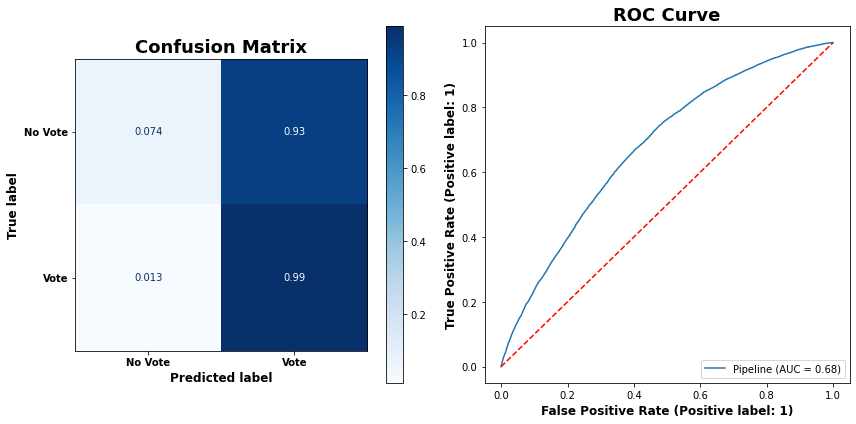

In [11]:
## Use preprocessor as the first step in modeling Pipeline 
xgb_bin_2020 = Pipeline(steps=[('preprocessing', preprocessing),
                      ('xgb', XGBClassifier(random_state=random_seed,
                                            objective='binary:logistic'))])

xgb_bin_2020.fit(X_2020_train, y_bin_2020_train)

eval_bin_clf(xgb_bin_2020, X_2020_test, y_bin_2020_test,
             model_descr='Baseline 2020 Binary XGBoost with Default Params');

##### 2020 Tuning Binary XGBoost Hyperparameters

------------------------------------------------------------
***** Grid Search Started at 01/15/21 - 10:36:01 AM
------------------------------------------------------------


***** Training Completed at 01/15/21 - 10:37:00 AM

***** Total Training Time: 0:00:59.690408


Best Parameters:
{'xgb__colsample_bytree': 0.8, 'xgb__eta': 0.1, 'xgb__max_delta_step': 1, 'xgb__max_depth': 6, 'xgb__scale_pos_weight': 0.28, 'xgb__subsample': 0.85}


------------------------------------------------------------------------
Classification Report: Best 2020 Binary XGB Tuned for Balanced Accuracy
------------------------------------------------------------------------
              precision    recall  f1-score   support

     No Vote       0.34      0.58      0.43      9211
        Vote       0.85      0.69      0.76     32624

    accuracy                           0.66     41835
   macro avg       0.60      0.63      0.60     41835
weighted avg       0.74      0.66      0.69     41835

--------------

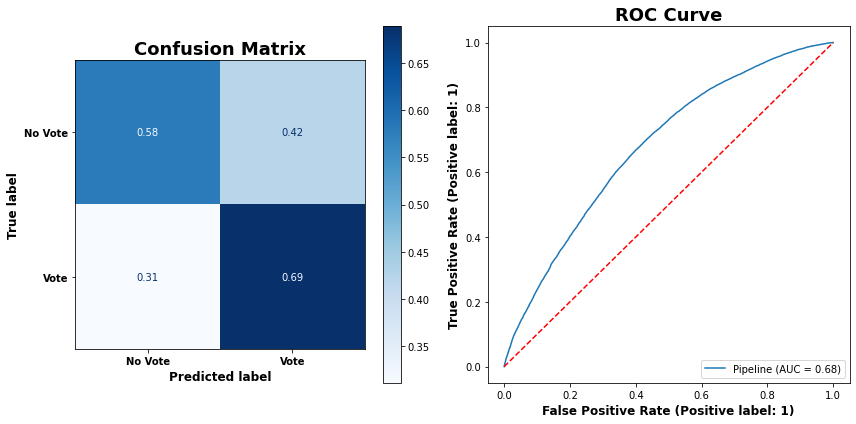

In [12]:
## Define a grid of different hyperparameter values to be tested
params = {
    'xgb__eta':[0.1],
    'xgb__max_depth':[6],
    'xgb__subsample': [0.85],
    'xgb__colsample_bytree': [0.8],
    'xgb__scale_pos_weight': [0.28],
    'xgb__max_delta_step': [1]
}

## run the grid search to test parameters and find the best estimator 
xgb_bin_2020_bacc_grid = fit_grid_clf(xgb_bin_2020, params,
                             X_2020_train, y_bin_2020_train,
                             X_2020_test, y_bin_2020_test,
                             model_descr='Best 2020 Binary XGB Tuned for Balanced Accuracy',
                             score='balanced_accuracy',
                             bin_target=True)

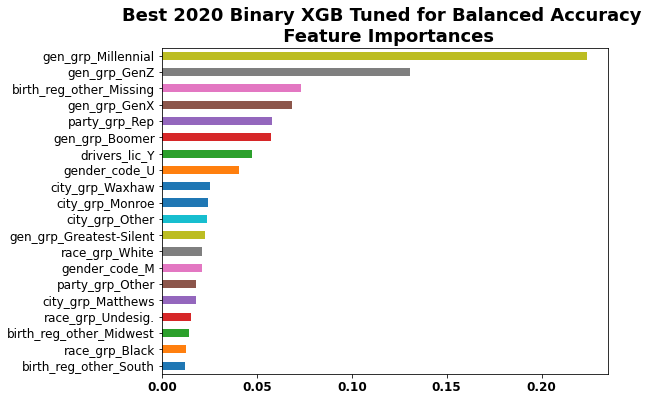

In [13]:
plot_feat_importance(xgb_bin_2020_bacc_grid.best_estimator_, 'xgb', feature_names_2020,
                     model_title='Best 2020 Binary XGB Tuned for Balanced Accuracy \n');

### 2020 Multiclass Target - Early, Election Day, No Vote

#### 2020 Prepare DataFrame for Modeling - Train Test Split and Preprocessing

In [14]:
## Inspect model_2020_df
display(model_2020_df.head())
len(model_2020_df)

,Gen_2020,Gen_2020_binary,gen_grp,party_grp,race_grp,gender_code,birth_reg_other,drivers_lic,city_grp
0,Early,1,Boomer,Rep,White,M,South,Y,Indian Trail
1,No Vote,0,Boomer,Other,White,M,Northeast,Y,Waxhaw
2,Early,1,GenX,Dem,White,F,Midwest,Y,Waxhaw
3,No Vote,0,Boomer,Rep,White,F,Northeast,Y,Monroe
4,Early,1,GenX,Dem,Black,F,South,Y,Matthews


167337

In [15]:
## Check that only the 3 target classes that represent a voter's choice remain
check_unique('Gen_2020', model_2020_df)

,count,%
Early,110735,66.17
No Vote,36587,21.86
Election Day,20015,11.96


In [16]:
## Define target variable
multi_2020_target = 'Gen_2020'

## Separate features (X) and target (y) for train-test-split
## X was already defined for previous models,
  ## only need to adjust for new target
y_multi_2020 = model_2020_df[multi_2020_target].copy()

## Split the data into training and test sets prior to preprocessing
  ## Random seed same as for binary modeling, so produces same X splits
X_2020_train, X_2020_test, y_multi_2020_train, y_multi_2020_test = train_test_split(X_2020,
                                                                y_multi_2020,
                                                                test_size=0.25,
                                                                random_state=random_seed)

## Preprocess training and test target (y)
le_2020 = LabelEncoder()
y_multi_2020_train = pd.Series(le_2020.fit_transform(y_multi_2020_train))
y_multi_2020_test = pd.Series(le_2020.transform(y_multi_2020_test))

## Check order of classes
le_2020.classes_

array(['Early', 'Election Day', 'No Vote'], dtype=object)

#### 2020 Best Multiclass Target Model - XGBoost with SMOTE

##### 2020 Baseline Multiclass XGBoost with SMOTE

-------------------------------------------------------------------------
Classification Report: 2020 Multiclass SMOTE XGBoost with Default Params
-------------------------------------------------------------------------
              precision    recall  f1-score   support

       Early       0.76      0.56      0.64     27591
Election Day       0.18      0.37      0.24      5033
     No Vote       0.38      0.46      0.42      9211

    accuracy                           0.51     41835
   macro avg       0.44      0.46      0.43     41835
weighted avg       0.61      0.51      0.54     41835

-------------------------------------------------------------------------
-------------------------------------------------------------------------




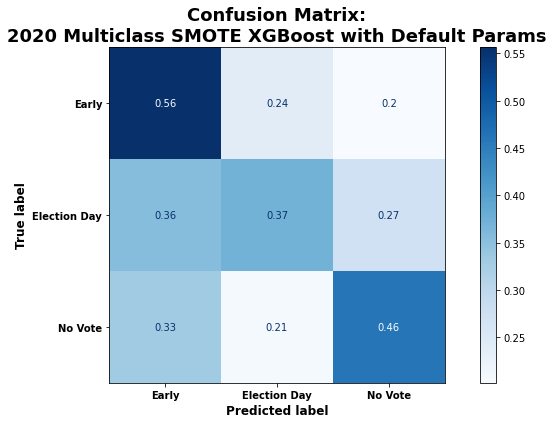

In [17]:
## Use preprocessor as the first step in modeling Pipeline,
  ## followed by SMOTE for oversampling
xgb_multi_2020_smote = imbPipeline(steps=[
    ('preprocessing', preprocessing),
    ('sampler', SMOTE(random_state=random_seed, n_jobs=-1)),
    ('xgb', XGBClassifier(random_state=random_seed))])

xgb_multi_2020_smote.fit(X_2020_train, y_multi_2020_train)

eval_classifier(xgb_multi_2020_smote, X_2020_test, y_multi_2020_test,
                model_descr='2020 Multiclass SMOTE XGBoost with Default Params');

##### 2020 Tuning Multiclass XGBoost with SMOTE Hyperparameters

------------------------------------------------------------
***** Grid Search Started at 01/15/21 - 10:39:05 AM
------------------------------------------------------------


***** Training Completed at 01/15/21 - 10:45:08 AM

***** Total Training Time: 0:06:03.123295


Best Parameters:
{'sampler__k_neighbors': 3, 'xgb__colsample_bytree': 0.8, 'xgb__eta': 0.1, 'xgb__max_delta_step': 1, 'xgb__max_depth': 6, 'xgb__subsample': 0.7}


----------------------------------------------------------------------------------
Classification Report: Best 2020 Multiclass SMOTE XGB Tuned for Balanced Accuracy
----------------------------------------------------------------------------------
              precision    recall  f1-score   support

       Early       0.76      0.53      0.63     27591
Election Day       0.18      0.40      0.24      5033
     No Vote       0.38      0.46      0.42      9211

    accuracy                           0.50     41835
   macro avg       0.44      0.46      0.43 

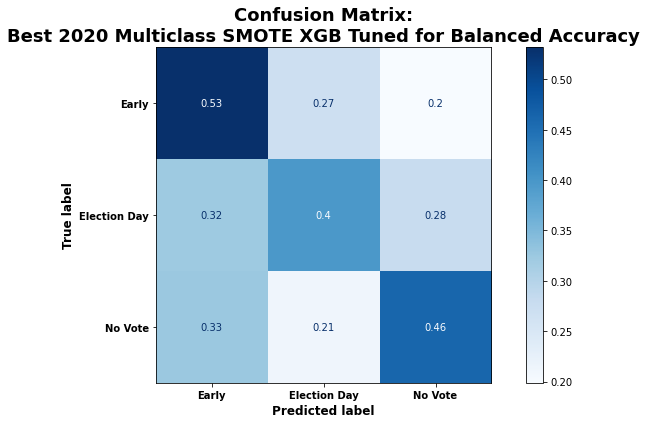

In [18]:
## Define a grid of different hyperparameter values to be tested
params = {
    'sampler__k_neighbors':[3],
    'xgb__eta':[0.1],
    'xgb__max_depth':[6],
    'xgb__subsample': [0.7],
    'xgb__colsample_bytree': [0.8],
    'xgb__max_delta_step': [1]
}

## run the grid search to test parameters and find the best estimator 
xgb_multi_2020_smote_bacc_grid = fit_grid_clf(xgb_multi_2020_smote, params,
                             X_2020_train, y_multi_2020_train,
                             X_2020_test, y_multi_2020_test,
                             model_descr='Best 2020 Multiclass SMOTE XGB Tuned for Balanced Accuracy',
                             score='balanced_accuracy')

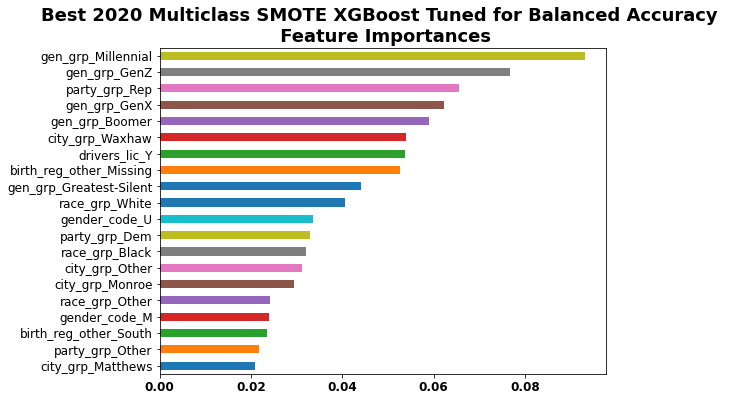

In [19]:
plot_feat_importance(xgb_multi_2020_smote_bacc_grid.best_estimator_, 'xgb', feature_names_2020,
                     model_title='Best 2020 Multiclass SMOTE XGBoost Tuned for Balanced Accuracy \n');

## Model 2016 Election

### 2016 Binary Target - Vote vs. No Vote

#### 2016 Prepare DataFrame for Modeling - Train Test Split and Preprocessing

In [20]:
## Create new DataFrame from the full cleaned df that only consists of 
  ## the target ('Gen_2016') and desired predictors
model_2016_df = elec_2016_df.copy()
model_2016_df = model_2016_df[['Gen_2016', 'Gen_2016_binary', 'gen_grp', 'party_grp',
                     'race_grp', 'gender_code', 'birth_reg_other',
                     'drivers_lic', 'city_grp']]

# Drop the 'Other' voting method so train-test-splits constant across
## binary and multiclass target models
  ## 'Other' represents provisional and transfer ballots. This type of
    ## vote is not so much generated by a voter's choice as it is by the 
    ## legal process of how votes may be cast.
model_2016_df = model_2016_df.drop(model_2016_df.loc[model_2016_df['Gen_2016']=='Other'].index)

## Inspect the resulting df
display(model_2016_df.head())
len(model_2016_df)

,Gen_2016,Gen_2016_binary,gen_grp,party_grp,race_grp,gender_code,birth_reg_other,drivers_lic,city_grp
0,Early,1,Boomer,Rep,White,M,South,Y,Indian Trail
1,Early,1,Boomer,Other,White,M,Northeast,Y,Waxhaw
2,Early,1,Boomer,Rep,White,F,Northeast,Y,Monroe
3,Early,1,GenX,Dem,Black,F,South,Y,Matthews
4,Early,1,GenX,Dem,White,M,Northeast,Y,Indian Trail


122061

In [21]:
## Check class imbalance
check_unique('Gen_2016_binary', model_2016_df)

,count,%
1,101064,82.8
0,20997,17.2


In [22]:
## Define target variable
bin_2016_target = 'Gen_2016_binary'

## Separate features (X) and target (y) for train-test-split
X_2016 = model_2016_df.drop(columns=[bin_2016_target, 'Gen_2016'], axis=1).copy()
y_bin_2016 = model_2016_df[bin_2016_target].copy()

## Split the data into training and test sets prior to preprocessing
X_2016_train, X_2016_test, y_bin_2016_train, y_bin_2016_test = train_test_split(X_2016, y_bin_2016,
                                                            test_size=0.25,
                                                            random_state=random_seed)

## Make a list of all columns that are currently object dtype
cat_cols = list(X_2016_train.select_dtypes('O').columns)

## Create a pipeline for one hot encoding categorical columns
cat_transformer = Pipeline(steps = [
    ('ohe', OneHotEncoder(handle_unknown='error', 
                          sparse=False,
                          drop='if_binary'))])

## Define pipeline for preprocessing X
preprocessing = ColumnTransformer(transformers=[
    ('cat', cat_transformer, cat_cols)
])

## Preprocess training and test predictors (X)
X_2016_train_tf = preprocessing.fit_transform(X_2016_train)
X_2016_test_tf = preprocessing.transform(X_2016_test)

## Get the feature names in the order they appear in preprocessed data
feature_names_2016 = preprocessing.named_transformers_['cat'].named_steps['ohe'].get_feature_names(cat_cols)
feature_names_2016

array(['gen_grp_Boomer', 'gen_grp_GenX', 'gen_grp_GenZ',
       'gen_grp_Greatest-Silent', 'gen_grp_Millennial', 'party_grp_Dem',
       'party_grp_Other', 'party_grp_Rep', 'race_grp_Black',
       'race_grp_Other', 'race_grp_Undesig.', 'race_grp_White',
       'gender_code_F', 'gender_code_M', 'gender_code_U',
       'birth_reg_other_Midwest', 'birth_reg_other_Missing',
       'birth_reg_other_Northeast', 'birth_reg_other_Other',
       'birth_reg_other_South', 'birth_reg_other_West', 'drivers_lic_Y',
       'city_grp_Indian Trail', 'city_grp_Matthews', 'city_grp_Monroe',
       'city_grp_Other', 'city_grp_Waxhaw'], dtype=object)

#### 2016 Best Binary Target Model - XGBoost Classifier

##### 2016 Baseline Binary XGBoost

------------------------------------------------------------------------
Classification Report: Baseline 2016 Binary XGBoost with Default Params
------------------------------------------------------------------------
              precision    recall  f1-score   support

     No Vote       0.61      0.07      0.13      5278
        Vote       0.84      0.99      0.91     25238

    accuracy                           0.83     30516
   macro avg       0.72      0.53      0.52     30516
weighted avg       0.80      0.83      0.77     30516

------------------------------------------------------------------------
------------------------------------------------------------------------




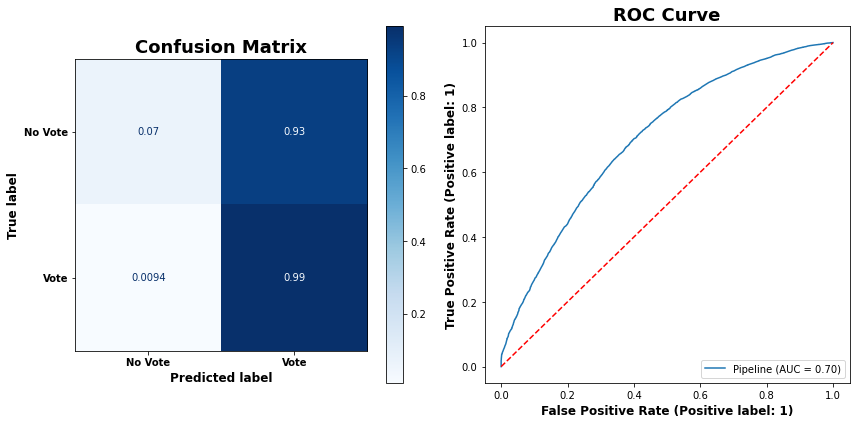

In [23]:
## Use preprocessor as the first step in modeling Pipeline 
xgb_bin_2016 = Pipeline(steps=[('preprocessing', preprocessing),
                          ('xgb', XGBClassifier(random_state=random_seed,
                                                objective='binary:logistic'))])

xgb_bin_2016.fit(X_2016_train, y_bin_2016_train)

eval_bin_clf(xgb_bin_2016, X_2016_test, y_bin_2016_test,
             model_descr='Baseline 2016 Binary XGBoost with Default Params');

##### 2016 Tuning Binary XGBoost Hyperparameters

------------------------------------------------------------
***** Grid Search Started at 01/15/21 - 10:45:24 AM
------------------------------------------------------------


***** Training Completed at 01/15/21 - 10:45:49 AM

***** Total Training Time: 0:00:24.911940


Best Parameters:
{'xgb__colsample_bytree': 0.7, 'xgb__eta': 0.1, 'xgb__max_delta_step': 1, 'xgb__max_depth': 4, 'xgb__scale_pos_weight': 0.2, 'xgb__subsample': 0.75}


------------------------------------------------------------------------
Classification Report: Best 2016 Binary XGB Tuned for Balanced Accuracy
------------------------------------------------------------------------
              precision    recall  f1-score   support

     No Vote       0.30      0.59      0.40      5278
        Vote       0.89      0.71      0.79     25238

    accuracy                           0.69     30516
   macro avg       0.60      0.65      0.59     30516
weighted avg       0.79      0.69      0.72     30516

---------------

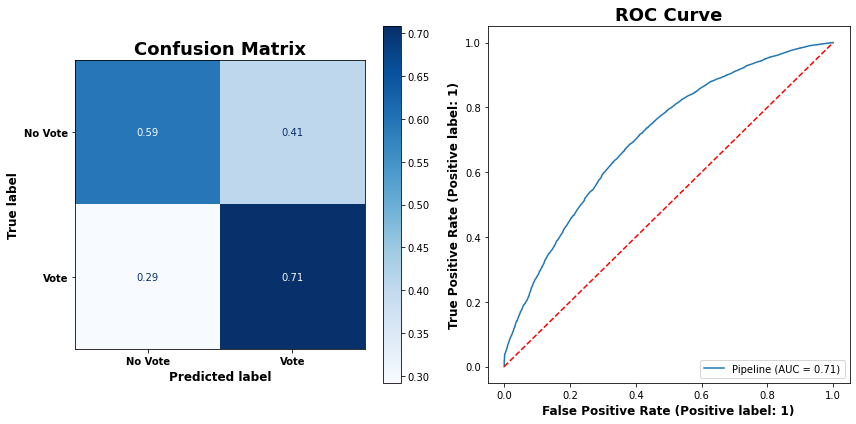

In [24]:
## Define a grid of different hyperparameter values to be tested
params = {
    'xgb__eta':[0.1],
    'xgb__max_depth':[4],
    'xgb__subsample': [0.75],
    'xgb__colsample_bytree': [0.7],
    'xgb__scale_pos_weight': [0.20],
    'xgb__max_delta_step': [1]
}

## run the grid search to test parameters and find the best estimator 
xgb_bin_2016_bacc_grid = fit_grid_clf(xgb_bin_2016, params,
                                 X_2016_train, y_bin_2016_train,
                                 X_2016_test, y_bin_2016_test,
                                 model_descr='Best 2016 Binary XGB Tuned for Balanced Accuracy',
                                 score='balanced_accuracy',
                                 bin_target=True)

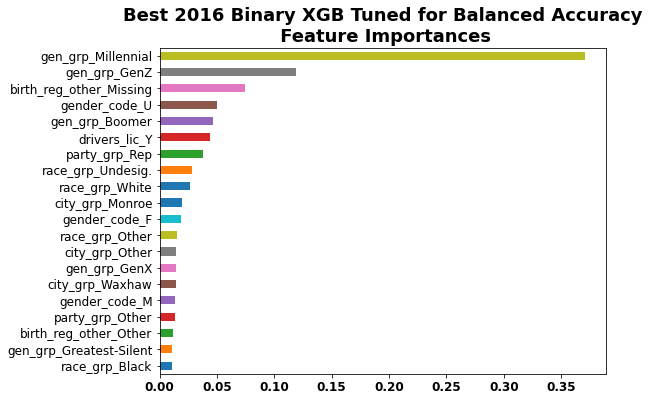

In [25]:
plot_feat_importance(xgb_bin_2016_bacc_grid.best_estimator_, 'xgb', feature_names_2016,
                      model_title='Best 2016 Binary XGB Tuned for Balanced Accuracy\n');

### 2016 Multiclass Target - Early, Election Day, No Vote

#### 2016 Prepare DataFrame for Modeling - Train Test Split and Preprocessing

In [26]:
## Inspect the resulting df
display(model_2016_df.head())
len(model_2016_df)

,Gen_2016,Gen_2016_binary,gen_grp,party_grp,race_grp,gender_code,birth_reg_other,drivers_lic,city_grp
0,Early,1,Boomer,Rep,White,M,South,Y,Indian Trail
1,Early,1,Boomer,Other,White,M,Northeast,Y,Waxhaw
2,Early,1,Boomer,Rep,White,F,Northeast,Y,Monroe
3,Early,1,GenX,Dem,Black,F,South,Y,Matthews
4,Early,1,GenX,Dem,White,M,Northeast,Y,Indian Trail


122061

In [27]:
## Check that only the 3 target classes that represent a voter's choice remain
check_unique('Gen_2016', model_2016_df)

,count,%
Early,71235,58.36
Election Day,29829,24.44
No Vote,20997,17.20


In [28]:
## Define target variable
multi_2016_target = 'Gen_2016'

## Separate features (X) and target (y) for train-test-split
## X was already defined for previous models,
  ## only need to adjust for new target
y_multi_2016 = model_2016_df[multi_2016_target].copy()

## Split the data into training and test sets prior to preprocessing
  ## Random seed same as for binary modeling, so produces same X splits
X_2016_train, X_2016_test, y_multi_2016_train, y_multi_2016_test = train_test_split(X_2016, y_multi_2016,
                                                                test_size=0.25,
                                                    random_state=random_seed)

## Preprocess training and test target (y)
le_2016 = LabelEncoder()
y_multi_2016_train = pd.Series(le_2016.fit_transform(y_multi_2016_train))
y_multi_2016_test = pd.Series(le_2016.transform(y_multi_2016_test))

## Check order of classes
le_2016.classes_

array(['Early', 'Election Day', 'No Vote'], dtype=object)

#### 2016 Best Multiclass Target Model - XGBoost with SMOTE

##### 2016 Baseline Multiclass XGBoost with SMOTE

-------------------------------------------------------------------------
Classification Report: 2016 Multiclass SMOTE XGBoost with Default Params
-------------------------------------------------------------------------
              precision    recall  f1-score   support

       Early       0.68      0.52      0.59     17799
Election Day       0.31      0.39      0.34      7439
     No Vote       0.34      0.49      0.40      5278

    accuracy                           0.48     30516
   macro avg       0.44      0.46      0.44     30516
weighted avg       0.53      0.48      0.50     30516

-------------------------------------------------------------------------
-------------------------------------------------------------------------




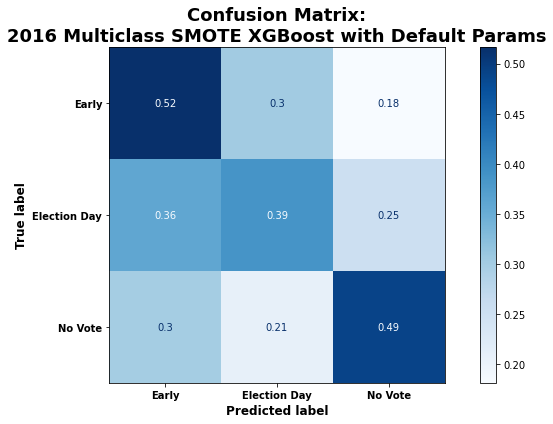

In [29]:
## Use preprocessor as the first step in modeling Pipeline,
  ## followed by SMOTE for oversampling
xgb_multi_2016_smote = imbPipeline(steps=[
    ('preprocessing', preprocessing),
    ('sampler', SMOTE(random_state=random_seed, n_jobs=-1)),
    ('xgb', XGBClassifier(random_state=random_seed))])

xgb_multi_2016_smote.fit(X_2016_train, y_multi_2016_train)

eval_classifier(xgb_multi_2016_smote, X_2016_test, y_multi_2016_test,
                model_descr='2016 Multiclass SMOTE XGBoost with Default Params');

##### 2016 Tuning Multiclass XGBoost with SMOTE Hyperparameters

In [ ]:
## Define a grid of different hyperparameter values to be tested
params = {
    'sampler__k_neighbors':[3],
    'xgb__eta':[0.1],
    'xgb__max_depth':[4],
    'xgb__subsample': [0.85],
    'xgb__colsample_bytree': [0.65],
    'xgb__max_delta_step': [1]
}

## run the grid search to test parameters and find the best estimator 
xgb_multi_2016_smote_bacc_grid = fit_grid_clf(xgb_multi_2016_smote, params,
                             X_2016_train, y_multi_2016_train,
                             X_2016_test, y_multi_2016_test,
                             model_descr='Best 2016 Multiclass SMOTE XGB Tuned for Balanced Accuracy',
                             score='balanced_accuracy')

------------------------------------------------------------
***** Grid Search Started at 01/15/21 - 10:47:14 AM
------------------------------------------------------------



In [ ]:
plot_feat_importance(xgb_multi_2016_smote_bacc_grid.best_estimator_, 'xgb', feature_names_2016,
                     model_title='Best 2016 Multiclass SMOTE XGBoost Tuned for Balanced Accuracy\n');

## Model 2012 Election

### 2012 Binary Target - Vote vs. No Vote

#### 2012 Prepare DataFrame for Modeling - Train Test Split and Preprocessing

In [ ]:
## Create new DataFrame from the full cleaned df that only consists of 
  ## the target ('Gen_2012') and desired predictors
model_2012_df = elec_2012_df.copy()
model_2012_df = model_2012_df[['Gen_2012', 'Gen_2012_binary', 'gen_grp', 'party_grp',
                     'race_grp', 'gender_code', 'birth_reg_other',
                     'drivers_lic', 'city_grp']]

## Drop the 'Other' voting method so train-test-splits constant across
## binary and multiclass target models
  ## 'Other' represents provisional and transfer ballots. This type of
    ## vote is not so much generated by a voter's choice as it is by the 
    ## legal process of how votes may be cast.
model_2012_df = model_2012_df.drop(model_2012_df.loc[model_2012_df['Gen_2012']=='Other'].index)

## Inspect the resulting df
display(model_2012_df.head())
len(model_2012_df)

In [ ]:
## Check class imbalance
check_unique('Gen_2012_binary', model_2012_df)

In [ ]:
## Define target variable
bin_2012_target = 'Gen_2012_binary'

## Separate features (X) and target (y) for train-test-split
X_2012 = model_2012_df.drop(columns=[bin_2012_target, 'Gen_2012'], axis=1).copy()
y_bin_2012 = model_2012_df[bin_2012_target].copy()

## Split the data into training and test sets prior to preprocessing
X_2012_train, X_2012_test, y_bin_2012_train, y_bin_2012_test = train_test_split(X_2012, y_bin_2012, test_size=0.25,
                                                    random_state=random_seed)

## Make a list of all columns that are currently object dtype
cat_cols = list(X_2012_train.select_dtypes('O').columns)

## Create a pipeline for one hot encoding categorical columns
cat_transformer = Pipeline(steps = [
    ('ohe', OneHotEncoder(handle_unknown='error', 
                          sparse=False,
                          drop='if_binary'))])

## Combine num and cat transformer pipelines into a single pipeline
  ## for preprocessing X
preprocessing = ColumnTransformer(transformers=[
    ('cat', cat_transformer, cat_cols)
])

## Preprocess training and test predictors (X)
X_2012_train_tf = preprocessing.fit_transform(X_2012_train)
X_2012_test_tf = preprocessing.transform(X_2012_test)

## Get the feature names in the order they appear in preprocessed data
feature_names_2012 = preprocessing.named_transformers_['cat'].named_steps['ohe'].get_feature_names(cat_cols)
feature_names_2012

#### 2012 Best Binary Target Model - XGBoost Classifier

##### 2012 Baseline Binary XGBoost

In [ ]:
## Use preprocessor as the first step in modeling Pipeline 
xgb_bin_2012 = Pipeline(steps=[('preprocessing', preprocessing),
                          ('xgb', XGBClassifier(random_state=random_seed,
                                            objective='binary:logistic'))])

xgb_bin_2012.fit(X_2012_train, y_bin_2012_train)

eval_bin_clf(xgb_bin_2012, X_2012_test, y_bin_2012_test,
             model_descr='Baseline 2012 Binary XGBoost with Default Params');

##### 2012 Tuning Binary XGBoost Hyperparameters

In [ ]:
## Define a grid of different hyperparameter values to be tested
params = {
    'xgb__eta':[0.1],
    'xgb__max_depth':[5],
    'xgb__subsample': [0.9],
    'xgb__colsample_bytree': [0.8],
    'xgb__scale_pos_weight': [0.12],
    'xgb__max_delta_step': [1]
}

## run the grid search to test parameters and find the best estimator 
xgb_bin_2012_bacc_grid = fit_grid_clf(xgb_bin_2012, params,
                             X_2012_train, y_bin_2012_train,
                             X_2012_test, y_bin_2012_test,
                             model_descr='Best 2012 Binary XGB Tuned for Balanced Accuracy',
                             score='balanced_accuracy',
                             bin_target=True)

In [ ]:
plot_feat_importance(xgb_bin_2012_bacc_grid.best_estimator_, 'xgb', feature_names_2012,
                      model_title='Best 2012 Binary XGB Tuned for Balanced Accuracy\n');

### 2012 Multiclass Target - Early, Election Day, No Vote

#### 2012 Prepare DataFrame for Modeling - Train Test Split and Preprocessing

In [ ]:
## Inspect the resulting df
display(model_2012_df.head())
len(model_2012_df)

In [ ]:
## Check that only the 3 target classes that represent a voter's choice remain
check_unique('Gen_2012', model_2012_df)

In [ ]:
## Define target variable
multi_2012_target = 'Gen_2012'

## Separate features (X) and target (y) for train-test-split
## X was already defined for previous models,
  ## only need to adjust for new target
y_multi_2012 = model_2012_df[multi_2012_target].copy()

## Split the data into training and test sets prior to preprocessing
  ## Random seed same as for binary modeling, so produces same X splits
X_2012_train, X_2012_test, y_multi_2012_train, y_multi_2012_test = train_test_split(X_2012, y_multi_2012, test_size=0.25,
                                                    random_state=random_seed)

## Preprocess training and test target (y)
le_2012 = LabelEncoder()
y_multi_2012_train = pd.Series(le_2012.fit_transform(y_multi_2012_train))
y_multi_2012_test = pd.Series(le_2012.transform(y_multi_2012_test))

## Check order of classes
le_2012.classes_

#### 2012 Best Multiclass Target Model - XGBoost with SMOTE

##### 2012 Baseline Multiclass XGBoost with SMOTE

In [ ]:
## Use preprocessor as the first step in modeling Pipeline,
  ## followed by SMOTE for oversampling
xgb_multi_2012_smote = imbPipeline(steps=[
    ('preprocessing', preprocessing),
    ('sampler', SMOTE(random_state=random_seed, n_jobs=-1)),
    ('xgb', XGBClassifier(random_state=random_seed))])

xgb_multi_2012_smote.fit(X_2012_train, y_multi_2012_train)

eval_classifier(xgb_multi_2012_smote, X_2012_test, y_multi_2012_test,
                model_descr='2012 Multiclass SMOTE XGBoost with Default Params');

##### 2012 Tuning Multiclass XGBoost with SMOTE Hyperparameters

In [ ]:
## Define a grid of different hyperparameter values to be tested
params = {
    'sampler__k_neighbors':[3],
    'xgb__eta':[0.1],
    'xgb__max_depth':[5],
    'xgb__subsample': [0.95],
    'xgb__colsample_bytree': [0.7],
    'xgb__max_delta_step': [1]
}

## run the grid search to test parameters and find the best estimator 
xgb_multi_2012_smote_bacc_grid = fit_grid_clf(xgb_multi_2012_smote, params,
                             X_2012_train, y_multi_2012_train,
                             X_2012_test, y_multi_2012_test,
                             model_descr='Best 2012 Multiclass SMOTE XGB Tuned for Balanced Accuracy',
                             score='balanced_accuracy')

In [ ]:
plot_feat_importance(xgb_multi_2012_smote_bacc_grid.best_estimator_, 'xgb', feature_names_2012,
                     model_title='Best 2012 Multiclass SMOTE XGBoost Tuned for Balanced Accuracy \n');

# INTERPRET

In [ ]:
## Import necessary libraries
import xgboost
import shap

## Load JS visualization code to notebook
shap.initjs()

## Interpret 2020 Election

In [ ]:
## Convert transformed (preprocessed) X train set into pandas DataFrame
X_2020_train_df = pd.DataFrame(X_2020_train_tf, columns=feature_names_2020)
X_2020_train_df.head()

### 2020 Binary Target Model

In [ ]:
## Store the booster (trained model)
bin_2020_model = xgb_bin_2020_bacc_grid.best_estimator_.named_steps['xgb'].get_booster()

## Explain the model's predictions using SHAP
bin_2020_explainer = shap.TreeExplainer(bin_2020_model)
bin_2020_shap_values = bin_2020_explainer.shap_values(X_2020_train_df)

In [ ]:
## Print model prediction for seventh row of training set
print('Prediction: ', 
      xgb_bin_2020_bacc_grid.best_estimator_.named_steps['xgb'].predict(X_2020_train_df.iloc[6,:]))
# (0, no vote)

## Print ground truth label seventh row of training set
print('Actual: ', 
      y_bin_2020_train.iloc[6])
# (0, truly no vote)

## Visualize the seventh prediction's explanation
shap.force_plot(bin_2020_explainer.expected_value,
                bin_2020_shap_values[6,:],
                X_2020_train_df.iloc[6,:])

The plot above visualizes how the model is making its prediction for the seventh individual in the training set. 
> The seventh individual did not vote and the model predicted this correctly. The model was pushed towards the prediction of "no vote" by the fact that the individual belongs to Gen Z (and thus is also neither in Generation X or a Baby Boomer). The fact that the individual was male and not a Republican also pushed the model towards the correct prediction for this individual. The facts that he lives in Matthews and is not a millennial pushed the model in the opposite direction, but not enough to overwhelm the factors more predictive of "no vote" (0).

In [ ]:
## Print model prediction for third row of training set
print(xgb_bin_2020_bacc_grid.best_estimator_.named_steps['xgb'].predict(X_2020_train_df.iloc[2,:]))
# (1, voted)

## Print ground truth label third row of training set
print('Actual: ', 
      y_bin_2020_train.iloc[2])
# (1, truly did vote)

## Visualize the third prediction's explanation
shap.force_plot(bin_2020_explainer.expected_value,
                bin_2020_shap_values[2,:],
                X_2020_train_df.iloc[2,:])

The plot immediately above visualizes how the model is making its prediction for the third individual in the training set. 
> The third individual voted and the model predicted this correctly. The model was pushed towards the prediction of "vote" (1) by the fact that their birth region information was missing, they belong to the Baby Boomer generation (and thus are not a millenial), and they have a drivers license. The fact the this person is not a Republican and also chose not to identify as being affiliated with either of the two major political parties pushed the model in the incorrect direction towards "no vote" (0), but not enough to overwhelm the factors more predictive of "vote" (1).

The plot below shows the impact each feature had on the model's output (predictions) quantified in terms of SHAP values. The top 7 features (after which there is a drop in impact) are `gen_grp_Millennial`, `birth_reg_other_Missing`, `party_grp_Rep`, `gen_grp_Boomer`, `gen_grp_GenX`, `gen_grp_GenZ`, and `drivers_lic_Y`. Obviously age group is important because it makes up 4 of the top 7 features. Only the oldest age group (really two oldest generations combined as 'Greatest-Silent') is missing. Whether or not a person's voter registration record lists their birthplace is the second most impactful feature on model output, and whether or not the voter registered as a Republican is the third most impactful feature. Whether or not the person possesses a drivers license was the 7th most impactful predictor.

In [ ]:
## Display mean abs(SHAP value) for each feature for the full training set
shap.summary_plot(bin_2020_shap_values, X_2020_train_df, plot_type='bar')

The plot below is similar to that above in that it ranks the top features based on mean SHAP values (so the ordering is the same). Each point represents a voter in the training set. The grey vertical line at 0.0 represents SHAP values that had 0 impact on model output, so the farther the points are from the grey line, the more important the feature was in terms of predicting that voter's participation in the election (whether they voted or not). Negative SHAP values to the left of the grey line push the model towards a prediction of 0 or "No Vote" whereas positive SHAP values push the model towards a prediction of 1 or "Vote". 

Since all the features were label encoded, each feature is a binary variable representing whether the voter does or does not belong to the category listed at the end of the feature name (so 1 for `gen_grp_Millenial` means the person is a millennial). Thus high values of 1 are color coded red and low values of 0 are color coded blue.

**Top 7 Features Explained**:

1. `gen_grp_Millennial` - Being a millenial (1, red) pushed the model towards a prediction of "No Vote".


2. `birth_reg_other_Missing` - Voters whose record was missing their birthplace information (1, red) were more likely to vote.


3. `party_grp_Rep` - Being a Republican (1, red) pushed the model towards a prediction of "Vote".


4. `gen_grp_Boomer` - Belonging to the Baby Boomer generation (1, red) pushed the model towards a prediction of "Vote".


5. `gen_grp_GenX` - Belonging to the Generation X (1, red) pushed the model towards a prediction of "Vote".


6. `gen_grp_GenZ` - Belonging to the Gen Z (1, red) pushed the model towards a prediction of "No Vote".


7. `drivers_lic_Y` - Not having a drivers license (0, blue) made the model predict that someone was less likely to vote.

In [ ]:
## Display mean abs(SHAP value) for each feature for the full training set
shap.summary_plot(bin_2020_shap_values, X_2020_train_df)

### 2020 Multiclass Target Model

In [ ]:
## Store the booster (trained model)
multi_2020_model = xgb_multi_2020_smote_bacc_grid.best_estimator_.named_steps['xgb'].get_booster()

## Explain the model's predictions using SHAP
multi_2020_explainer = shap.TreeExplainer(multi_2020_model)
multi_2020_shap_values = multi_2020_explainer.shap_values(X_2020_train_df)

## multi_2020_shap_values is a list of 3 arrays, one for each class
print(type(multi_2020_shap_values))
print(type(multi_2020_shap_values[0]))
print(multi_2020_shap_values[0].shape)
len(multi_2020_shap_values)

In [ ]:
## Check order of label encoded classes
le_2020.classes_

In [ ]:
## Store each class' array of values separately
early_multi_2020_shap = multi_2020_shap_values[0].shape
elec_multi_2020_shap = multi_2020_shap_values[1].shape
no_multi_2020_shap = multi_2020_shap_values[2].shape

## Print model pred and ground truth label for seventh row of training set
  ## and visualize prediction explanation
multi_shap_force(xgb_multi_2020_smote_bacc_grid.best_estimator_, 'xgb', 6,
                     X_2020_train_df, y_multi_2020_train,
                     multi_2020_explainer, multi_2020_shap_values)

The plots above visualize how the model is making its prediction for the seventh individual in the training set. 
> The seventh individual did not vote and the model predicted this correctly. The breakdown for the "No Vote" class is shown in the third plot. The other two plots show how the features influenced the model's prediction for this person for the other two classes, but in the case of multiclass models, the class with the highest score was ultimately the predicted output for each voter.

> Examining the bottom plot, the model was pushed towards the prediction of "No Vote" by the fact that the individual belongs to Gen Z (and thus is also neither in Generation X or a Baby Boomer). The fact that the individual was not a Republican, is not missing birthplace information, and is a male also pushed the model towards the correct prediction for this individual. The facts that he is white and lives in Matthews pushed the model in the opposite direction, but not enough to overwhelm the factors more predictive of "No Vote".

In [ ]:
## Print model pred and ground truth label for third row of training set
  ## and visualize prediction explanation
multi_shap_force(xgb_multi_2020_smote_bacc_grid.best_estimator_, 'xgb', 2,
                     X_2020_train_df, y_multi_2020_train,
                     multi_2020_explainer, multi_2020_shap_values)

The plots above visualize how the model is making its prediction for the third individual in the training set. 
> The third individual voted early, but the model predicted that they voted on election day. The breakdown for the "Early" class is shown in the first plot, while that for "Election Day" is in the second plot. For multiclass models, the class with the highest score was ultimately the predicted output for each voter. The score for "Election Day" was only 0.04 greater than the score for "Early".

> Examining the bottom plot, the model was pushed towards the prediction of "Election Day" by the fact that the individual lives in Monroe (and thus does not live in Waxhaw), that their birthplace information is missing in their registration record, and they are not a Democrat or Black. The fact that the individual is not a Generation X'er and is not male or a Republican, is not missing birthplace information, and is a male pushed the model in the opposite direction, but not enough to overwhelm the factors more predictive of "Election Day".

The plot below shows the impact each feature had on the model's output (predictions) quantified in terms of SHAP values. The top 6 features (after which there is a drop in impact) are `gen_grp_Millennial`, `gen_grp_GenX`, `birth_reg_other_Missing`, `party_grp_Rep`, `gen_grp_Boomer`, and `city_grp_Waxhaw`. These are almost exactly the same top features as for the binary target model, and are in a very similar order. Obviously age group is important because it makes up 3 of the top 6 features. Whether or not a person's voter registration record lists their birthplace is the third most impactful feature on model output, and whether or not the voter registered as a Republican is the fourth most impactful feature. Whether or not the voter resides in Waxhaw was the 6th most impactful predictor. The colors of the bars represent how much the particular feature influenced the prediction for each class, but these trends are more easily visualized in the non-bar summary plots that follow.

In [ ]:
## Display mean abs(SHAP value) of each feature for the full training set
  ## for all classes
shap.summary_plot(multi_2020_shap_values, X_2020_train_df,
                  plot_type='bar', class_names=le_2020.classes_)

The plots that follow are similar to the above plot in that they rank the top features based on mean SHAP values, but each plot ranks the features for one of the 3 target classes ("Early", "Election Day", and then "No Vote" respectively). Each point represents a voter in the training set. The grey vertical line at 0.0 represents SHAP values that had 0 impact on model output, so the farther the points are from the grey line, the more important the feature was in terms of predicting that voter's participation in the election. Negative SHAP values to the left of the grey line push the model towards a prediction of 0 for the particular class (in other words, not the class in question), whereas positive SHAP values push the model towards a prediction of the class in question (1). 

Since all the features were label encoded, each feature is a binary variable representing whether the voter does or does not belong to the category listed at the end of the feature name (so 1 for `gen_grp_Millenial` means the person is a millennial). Thus high values of 1 are color coded red and low values of 0 are color coded blue.

---

**Top 5 Features for the "Early" Class Explained**:

1. `gen_grp_Millennial` - Being a millenial (1, red) pushed the model away from a prediction of "Early".


2. `gen_grp_Boomer` - Belonging to the Baby Boomer generation (1, red) pushed the model towards a prediction of "Early".


3. `city_grp_Monroe` - Residing in Monroe (1, red) pushed the model away from a prediction of "Early".


4. `city_grp_Waxhaw` - Residing in Waxhaw (1, red) pushed the model towards a prediction of "Early".


5. `gen_grp_Greatest-Silent` - Belonging to the Greatest/ Silent generation age group (1, red) pushed the model towards a prediction of "Early".

In [ ]:
multi_shap_summ(multi_2020_shap_values, X_2020_train_df, 0);

---

**Top 5 Features for the "Election Day" Class Explained**:

1. `city_grp_Waxhaw` - Residing in Waxhaw (1, red) pushed the model away from a prediction of "Election Day".


2. `gen_grp_GenX` - Belonging to the Baby Boomer generation (1, red) pushed the model towards a prediction of "Election Day".


3. `drivers_lic_Y` - Not having a drivers license (0, blue) pushed the model away from a prediction of "Election Day".


4. `race_grp_Black` - Being Black (1, red) pushed the model away from a prediction of "Election Day".


5. `party_grp_Dem` - Being a Democrat pushed the model away from a prediction of "Election Day".

In [ ]:
multi_shap_summ(multi_2020_shap_values, X_2020_train_df, 1);

---

**Top 5 Features for the "No Vote" Class Explained**:

1. `birth_reg_other_Missing` - Missing information about birthplace (1, red) pushed the model away from a prediction of "No Vote".


2. `party_grp_Rep` - Being a Republican (1, red) pushed the model away from a prediction of "No Vote" and not being a Republican (0, blue) pushed the model towards a prediction of "No Vote".


3. `gen_grp_GenX` -  Belonging to Generation X (1, red) pushed the model away from a prediction of "No Vote".


4. `gen_grp_Boomer` - Being a Baby Boomer (1, red) pushed the model away from a prediction of "No Vote".


5. `drivers_lic_Y` - Not having a drivers license (0, blue) pushed the model towards a prediction of "No Vote".

In [ ]:
multi_shap_summ(multi_2020_shap_values, X_2020_train_df, 2);

## Interpret 2016 Election

In [ ]:
## Convert transformed (preprocessed) X train set into pandas DataFrame
X_2016_train_df = pd.DataFrame(X_2016_train_tf, columns=feature_names_2016)
X_2016_train_df.head()

### 2016 Binary Target Model

In [ ]:
## Store the booster (trained model)
bin_2016_model = xgb_bin_2016_bacc_grid.best_estimator_.named_steps['xgb'].get_booster()

## Explain the model's predictions using SHAP
bin_2016_explainer = shap.TreeExplainer(bin_2016_model)
bin_2016_shap_values = bin_2016_explainer.shap_values(X_2016_train_df)

In [ ]:
## Print model prediction for third row of training set
print(xgb_bin_2016_bacc_grid.best_estimator_.named_steps['xgb'].predict(X_2016_train_df.iloc[2,:]))
# (0, no vote)

## Print ground truth label third row of training set
print('Actual: ', 
      y_bin_2016_train.iloc[2])
# (0, truly did not vote)

## Visualize the third prediction's explanation
shap.force_plot(bin_2016_explainer.expected_value,
                bin_2016_shap_values[2,:],
                X_2016_train_df.iloc[2,:])

The plot above visualizes how the model is making its prediction for the third individual in the training set. 
> The third individual did not vote and the model predicted this correctly. The model was pushed towards the prediction of "No Vote" (0) by the fact that the individual belongs to Gen Z. The fact that the individual is not a Republican, is not missing birthplace information, and resides in Monroe also pushed the model towards the correct prediction of "No Vote" for this individual.

In [ ]:
## Print model prediction for seventh row of training set
print('Prediction: ', 
      xgb_bin_2016_bacc_grid.best_estimator_.named_steps['xgb'].predict(X_2016_train_df.iloc[6,:]))
# (1, voted)

## Print ground truth label seventh row of training set
print('Actual: ', 
      y_bin_2016_train.iloc[6])
# (1, truly did vote)

## Visualize the seventh prediction's explanation
shap.force_plot(bin_2016_explainer.expected_value,
                bin_2016_shap_values[6,:],
                X_2016_train_df.iloc[6,:])

The plot immediately above visualizes how the model is making its prediction for the seventh individual in the training set. 
> The seventh individual voted and the model predicted this correctly. The model was pushed towards the prediction of "vote" (1) by the fact that their birth region information was missing, they belong to the Baby Boomer generation (and thus are not a millenial or Gen Z), and they have a drivers license. The fact the this person is not a Republican and resides in Monroe pushed the model in the incorrect direction towards "No Vote" (0), but not enough to overwhelm the factors more predictive of "Vote" (1).

The plot below shows the impact each feature had on the model's output (predictions) quantified in terms of SHAP values. The top 3 features (after which there is a drop in impact) are `gen_grp_Millennial`, `birth_reg_other_Missing`, and `party_grp_Rep`, respectively.

In [ ]:
## Display mean abs(SHAP value) for each feature for the full training set
shap.summary_plot(bin_2016_shap_values, X_2016_train_df, plot_type='bar')

The plot below is similar to that above in that it ranks the top features based on mean SHAP values (so the ordering is the same). Each point represents a voter in the training set. The grey vertical line at 0.0 represents SHAP values that had 0 impact on model output, so the farther the points are from the grey line, the more important the feature was in terms of predicting that voter's participation in the election (whether they voted or not). Negative SHAP values to the left of the grey line push the model towards a prediction of 0 or "No Vote" whereas positive SHAP values push the model towards a prediction of 1 or "Vote". 

Since all the features were label encoded, each feature is a binary variable representing whether the voter does or does not belong to the category listed at the end of the feature name (so 1 for `gen_grp_Millenial` means the person is a millennial). Thus high values of 1 are color coded red and low values of 0 are color coded blue.

**Top 3 Features Explained**:

1. `gen_grp_Millennial` - Being a millenial (1, red) pushed the model towards a prediction of "No Vote".


2. `birth_reg_other_Missing` - Voters whose record was missing their birthplace information (1, red) were more likely to vote.


3. `party_grp_Rep` - Being a Republican (1, red) pushed the model towards a prediction of "Vote" and not being a Republican (0, blue) pushed the model towards a prediction of "No Vote".

In [ ]:
## Display mean abs(SHAP value) for each feature for the full training set
shap.summary_plot(bin_2016_shap_values, X_2016_train_df)

### 2016 Multiclass Target Model

In [ ]:
## Store the booster (trained model)
multi_2016_model = xgb_multi_2016_smote_bacc_grid.best_estimator_.named_steps['xgb'].get_booster()

## Explain the model's predictions using SHAP
multi_2016_explainer = shap.TreeExplainer(multi_2016_model)
multi_2016_shap_values = multi_2016_explainer.shap_values(X_2016_train_df)

## multi_2016_shap_values is a list of 3 arrays, one for each class
print(type(multi_2016_shap_values))
print(type(multi_2016_shap_values[0]))
print(multi_2016_shap_values[0].shape)
len(multi_2016_shap_values)

In [ ]:
## Check order of label encoded classes
le_2016.classes_

In [ ]:
## Store each class' array of values separately
early_multi_2016_shap = multi_2016_shap_values[0].shape
elec_multi_2016_shap = multi_2016_shap_values[1].shape
no_multi_2016_shap = multi_2016_shap_values[2].shape

## Print model pred and ground truth label for third row of training set
  ## and visualize prediction explanation
multi_shap_force(xgb_multi_2016_smote_bacc_grid.best_estimator_, 'xgb', 2,
                     X_2016_train_df, y_multi_2016_train,
                     multi_2016_explainer, multi_2016_shap_values)

The plots above visualize how the model is making its prediction for the third individual in the training set. 
> The third individual did not vote and the model predicted this correctly. The breakdown for the "No Vote" class is shown in the third plot. The other two plots show how the features influenced the model's prediction for this person for the other two classes, but in the case of multiclass models, the class with the highest score was ultimately the predicted output for each voter.

> Examining the bottom plot, the model was pushed towards the prediction of "No Vote" by the fact that the individual belongs to Gen Z (and thus is not a Baby Boomer). The fact that the individual is not a Republican, is not missing birthplace information, and resides in Monroe also pushed the model towards the correct prediction for this individual.

In [ ]:
## Print model pred and ground truth label for seventh row of training set
  ## and visualize prediction explanation
multi_shap_force(xgb_multi_2016_smote_bacc_grid.best_estimator_, 'xgb', 6,
                     X_2016_train_df, y_multi_2016_train,
                     multi_2016_explainer, multi_2016_shap_values)

The plots above visualize how the model is making its prediction for the seventh individual in the training set. 
> The seventh individual voted early, and the model predicted this correctly. The breakdown for the "Early" class is shown in the first plot. For multiclass models, the class with the highest score was ultimately the predicted output for each voter.

> Examining the top plot, the model was pushed towards the prediction of "Early" by the fact that the individual is a Baby Boomer (and thus not a millennial), that their birthplace information is missing in their registration record, and they are not a male. The fact that the individual resides in Monroe and is not a Republican pushed the model in the opposite direction, but not enough to overwhelm the factors more predictive of "Early".

The plot below shows the impact each feature had on the model's output (predictions) quantified in terms of SHAP values. The top 5 features (after which there is a drop in impact) are `gen_grp_Millennial`, `birth_reg_other_Missing`, `gen_grp_Boomer`, `gen_grp_GenX`, and `party_grp_Rep`. These are very similar to the top features for the binary target model, and are in a very similar order. Obviously age group is important because it makes up 3 of the top 5 features. Whether or not a person's voter registration record lists their birthplace is the second most impactful feature on model output, and whether or not the voter registered as a Republican is the fifth most impactful feature. The colors of the bars represent how much the particular feature influenced the prediction for each class, but these trends are more easily visualized in the non-bar summary plots that follow.

In [ ]:
## Display mean abs(SHAP value) of each feature for the full training set
  ## for all classes
shap.summary_plot(multi_2016_shap_values, X_2016_train_df,
                  plot_type='bar', class_names=le_2016.classes_)

The plots that follow are similar to the above plot in that they rank the top features based on mean SHAP values, but each plot ranks the features for one of the 3 target classes ("Early", "Election Day", and then "No Vote" respectively). Each point represents a voter in the training set. The grey vertical line at 0.0 represents SHAP values that had 0 impact on model output, so the farther the points are from the grey line, the more important the feature was in terms of predicting that voter's participation in the election. Negative SHAP values to the left of the grey line push the model towards a prediction of 0 for the particular class (in other words, not the class in question), whereas positive SHAP values push the model towards a prediction of the class in question (1). 

Since all the features were label encoded, each feature is a binary variable representing whether the voter does or does not belong to the category listed at the end of the feature name (so 1 for `gen_grp_Millenial` means the person is a millennial). Thus high values of 1 are color coded red and low values of 0 are color coded blue.

---

**Top 5 Features for the "Early" Class Explained**:

1. `gen_grp_Millennial` - Being a millenial (1, red) pushed the model away from a prediction of "Early".


2. `gen_grp_Boomer` - Belonging to the Baby Boomer generation (1, red) pushed the model towards a prediction of "Early".


3. `city_grp_Monroe` - Residing in Monroe (1, red) pushed the model away from a prediction of "Early".


4. `gen_grp_Greatest-Silent` - Belonging to the Greatest/ Silent generation age group (1, red) pushed the model towards a prediction of "Early".


5. `gender_code_M` - Being male (1, red) pushed the model away from a prediction of "Early", while not being male (0, blue) pushed the model towards a prediction of "Early".

In [ ]:
multi_shap_summ(multi_2016_shap_values, X_2016_train_df, 0);

---

**Top 5 Features for the "Election Day" Class Explained**:

1. `gen_grp_GenX` - Belonging to Generation X (1, red) pushed the model towards a prediction of "Election Day" while not belonging to Generation X (0, blue) pushed the model away from a prediction of "Election Day".


2. `race_grp_Black` - Being Black (1, red) pushed the model away from a prediction of "Election Day".


3. `race_grp_White` - Not being wlack (0, blue) pushed the model away from a prediction of "Election Day".


4. `birth_reg_other_Missing` - Missing birthplace information (1, red) pushed the model towards a prediction of "Election Day".


5. `gen_grp_Greatest-Silent` - Belonging to the Greatest-Silent generation age group pushed the model away from a prediction of "Election Day".

In [ ]:
multi_shap_summ(multi_2016_shap_values, X_2016_train_df, 1);

---

**Top 5 Features for the "No Vote" Class Explained**:

1. `gen_grp_Millennial` - Being a millenial (1, red) pushed the model towards a prediction of "No Vote".


2. `birth_reg_other_Missing` - Missing information about birthplace (1, red) pushed the model away from a prediction of "No Vote".


3. `party_grp_Rep` - Being a Republican (1, red) pushed the model away from a prediction of "No Vote" and not being a Republican (0, blue) pushed the model towards a prediction of "No Vote".


4. `drivers_lic_Y` - Not having a drivers license (0, blue) pushed the model towards a prediction of "No Vote".


5. `gen_grp_Boomer` - Being a Baby Boomer (1, red) pushed the model away from a prediction of "No Vote".

In [ ]:
multi_shap_summ(multi_2016_shap_values, X_2016_train_df, 2);

## Interpret 2012 Election

In [ ]:
## Convert transformed (preprocessed) X train set into pandas DataFrame
X_2012_train_df = pd.DataFrame(X_2012_train_tf, columns=feature_names_2012)
X_2012_train_df.head()

### 2012 Binary Target Model

In [ ]:
## Store the booster (trained model)
bin_2012_model = xgb_bin_2012_bacc_grid.best_estimator_.named_steps['xgb'].get_booster()

## Explain the model's predictions using SHAP
bin_2012_explainer = shap.TreeExplainer(bin_2012_model)
bin_2012_shap_values = bin_2012_explainer.shap_values(X_2012_train_df)

## Print model prediction for fourth row of training set
print(xgb_bin_2012_bacc_grid.best_estimator_.named_steps['xgb'].predict(X_2012_train_df.iloc[3,:]))
# (1, voted)

## Print ground truth label fourth row of training set
print('Actual: ', 
      y_bin_2020_train.iloc[3])
# (1, truly did vote)

## Visualize the fourth prediction's explanation
shap.force_plot(bin_2012_explainer.expected_value,
                bin_2012_shap_values[3,:],
                X_2012_train_df.iloc[3,:])

The plot above visualizes how the model is making its prediction for the fourth individual in the training set. 
> The fourth individual did not vote and the model predicted this correctly. The model was pushed towards the prediction of "no vote" by the fact that the individual is a millennial, resides in Monroe, is not a Republican, is not missing birthplace information, and does not identify with one of the two major parties.

In [ ]:
## Print model prediction for seventh row of training set
print('Prediction: ', 
      xgb_bin_2012_bacc_grid.best_estimator_.named_steps['xgb'].predict(X_2012_train_df.iloc[6,:]))
# (0, no vote)

## Print ground truth label seventh row of training set
print('Actual: ', 
      y_bin_2020_train.iloc[6])
# (0, truly no vote)

## Visualize the seventh prediction's explanation
shap.force_plot(bin_2012_explainer.expected_value,
                bin_2012_shap_values[6,:],
                X_2012_train_df.iloc[6,:])

The plot immediately above visualizes how the model is making its prediction for the seventh individual in the training set. 
> The seventh individual voted and the model predicted this correctly. The model was pushed towards the prediction of "vote" (1) by the fact that their birth region information was missing, they are Black, and they belong to the Silent-Greatest generation age group.

The plot below shows the impact each feature had on the model's output (predictions) quantified in terms of SHAP values. The top 6 features (after which there is a drop in impact) are `gen_grp_Millennial`, `birth_reg_other_Missing`, `party_grp_Rep`, `gen_grp_GenX`, `race_grp_Black`, and `city_grp_Monroe`. Obviously age group is important because it makes up 2 of the top 6 features. Whether or not a person's voter registration record lists their birthplace is the second most impactful feature on model output, and whether or not the voter registered as a Republican is the third most impactful feature. Whether or not the person is Black or resides in the city of Monroe are the 4th and 5th most impactful predictors, respectively.

In [ ]:
## Display mean abs(SHAP value) for each feature for the full training set
shap.summary_plot(bin_2012_shap_values, X_2012_train_df, plot_type='bar')

The plot below is similar to that above in that it ranks the top features based on mean SHAP values (so the ordering is the same). Each point represents a voter in the training set. The grey vertical line at 0.0 represents SHAP values that had 0 impact on model output, so the farther the points are from the grey line, the more important the feature was in terms of predicting that voter's participation in the election (whether they voted or not). Negative SHAP values to the left of the grey line push the model towards a prediction of 0 or "No Vote" whereas positive SHAP values push the model towards a prediction of 1 or "Vote". 

Since all the features were label encoded, each feature is a binary variable representing whether the voter does or does not belong to the category listed at the end of the feature name (so 1 for `gen_grp_Millenial` means the person is a millennial). Thus high values of 1 are color coded red and low values of 0 are color coded blue.

**Top 6 Features Explained**:

1. `gen_grp_Millennial` - Being a millenial (1, red) pushed the model towards a prediction of "No Vote".


2. `birth_reg_other_Missing` - Voters whose record was missing their birthplace information (1, red) were more likely to vote.


3. `party_grp_Rep` - Being a Republican (1, red) pushed the model towards a prediction of "Vote".


4. `gen_grp_GenX` - Belonging to the Generation X (1, red) pushed the model towards a prediction of "Vote" and not belonging to Generation X (0, blue) pushed the model towards a prediction of "No Vote".


5. `race_grp_Black` - Being Black (1, red) pushed the model towards a prediction of "Vote".


6. `city_grp_Monroe` - Living in Monroe (1, red) pushed the model towards a prediction of "No Vote".

In [ ]:
## Display mean abs(SHAP value) for each feature for the full training set
shap.summary_plot(bin_2012_shap_values, X_2012_train_df)

### 2012 Multiclass Target Model

In [ ]:
## Store the booster (trained model)
multi_2012_model = xgb_multi_2012_smote_bacc_grid.best_estimator_.named_steps['xgb'].get_booster()

## Explain the model's predictions using SHAP
multi_2012_explainer = shap.TreeExplainer(multi_2012_model)
multi_2012_shap_values = multi_2012_explainer.shap_values(X_2012_train_df)

## multi_2012_shap_values is a list of 3 arrays, one for each class
print(type(multi_2012_shap_values))
print(type(multi_2012_shap_values[0]))
print(multi_2012_shap_values[0].shape)
len(multi_2012_shap_values)

In [ ]:
## Check order of label encoded classes
le_2012.classes_

In [ ]:
## Store each class' array of values separately
early_multi_2012_shap = multi_2012_shap_values[0].shape
elec_multi_2012_shap = multi_2012_shap_values[1].shape
no_multi_2012_shap = multi_2012_shap_values[2].shape

## Print model pred and ground truth label for fourth row of training set
  ## and visualize prediction explanation
multi_shap_force(xgb_multi_2012_smote_bacc_grid.best_estimator_, 'xgb', 3,
                     X_2012_train_df, y_multi_2012_train,
                     multi_2012_explainer, multi_2012_shap_values)

The plots above visualize how the model is making its prediction for the fourth individual in the training set. 
> The fourth individual did not vote and the model predicted this correctly. The breakdown for the "No Vote" class is shown in the third plot. The other two plots show how the features influenced the model's prediction for this person for the other two classes, but in the case of multiclass models, the class with the highest score was ultimately the predicted output for each voter.

> Examining the bottom plot, the model was pushed towards the prediction of "No Vote" by the fact that the individual is a millennial (and thus is also neither in Generation X or a Baby Boomer). The fact that the individual is not missing birthplace information also pushed the model towards the correct prediction for this individual. The facts that they are not male and they are a Republican pushed the model in the opposite, but not enough to overwhelm the factors more predictive of "No Vote".

In [ ]:
## Print model pred and ground truth label for seventh row of training set
  ## and visualize prediction explanation
multi_shap_force(xgb_multi_2012_smote_bacc_grid.best_estimator_, 'xgb', 6,
                     X_2012_train_df, y_multi_2012_train,
                     multi_2012_explainer, multi_2012_shap_values)

The plots above visualize how the model is making its prediction for the seventh individual in the training set. 
> The seventh individual voted early, and the model predicted this correctly. The breakdown for the "Early" class is shown in the first plot. For multiclass models, the class with the highest score was ultimately the predicted output for each voter.

> Examining the top plot, the model was pushed towards the prediction of "Early" by the fact that the individual belongs to the oldest age group (and thus not a Gen X'er or millennial), they are Black (and thus not white), and they were not born in the southern U.S.

The plot below shows the impact each feature had on the model's output (predictions) quantified in terms of SHAP values. The top 9 features (after which there is a drop in impact) are `gen_grp_Millennial`, `gen_grp_Greatest-Silent`, `birth_reg_other_Missing`, `party_grp_Rep`, `gen_grp_Boomer`, `race_grp_White`, `city_grp_Monroe`, `gen_grp_GenX`, and `race_grp_Black`. These are very similar to the top features of the binary target model, and are in a similar order. Obviously age group is important because it makes up 4 of the top 9 features. Whether or not a person's voter registration record lists their birthplace is the third most impactful feature on model output, and whether or not the voter registered as a Republican is the fourth most impactful feature. Whether or not the voter is white, a resident of Monroe, or Black were the 6th, 7th, and 9th most impactful predictors, respectively. The colors of the bars represent how much the particular feature influenced the prediction for each class, but these trends are more easily visualized in the non-bar summary plots that follow.

In [ ]:
## Display mean abs(SHAP value) of each feature for the full training set
  ## for all classes
shap.summary_plot(multi_2012_shap_values, X_2012_train_df,
                  plot_type='bar', class_names=le_2012.classes_)

The plots that follow are similar to the above plot in that they rank the top features based on mean SHAP values, but each plot ranks the features for one of the 3 target classes ("Early", "Election Day", and then "No Vote" respectively). Each point represents a voter in the training set. The grey vertical line at 0.0 represents SHAP values that had 0 impact on model output, so the farther the points are from the grey line, the more important the feature was in terms of predicting that voter's participation in the election. Negative SHAP values to the left of the grey line push the model towards a prediction of 0 for the particular class (in other words, not the class in question), whereas positive SHAP values push the model towards a prediction of the class in question (1). 

Since all the features were label encoded, each feature is a binary variable representing whether the voter does or does not belong to the category listed at the end of the feature name (so 1 for `gen_grp_Millenial` means the person is a millennial). Thus high values of 1 are color coded red and low values of 0 are color coded blue.

---

**Top 5 Features for the "Early" Class Explained**:

1. `gen_grp_Greatest-Silent` - Belonging to the Greatest/ Silent generation age group (1, red) pushed the model towards a prediction of "Early".


2. `gen_grp_Boomer` - Belonging to the Baby Boomer generation (1, red) pushed the model towards a prediction of "Early".


3. `race_grp_Black` - Being Black (1, red) pushed the model towards a prediction of "Early".


4. `gen_grp_Millennial` - Being a millennial (1, red) pushed the model away from a prediction of "Early".


5. ``race_grp_White`` - Not being white (0, blue) pushed the model towards a prediction of "Early".

In [ ]:
multi_shap_summ(multi_2012_shap_values, X_2012_train_df, 0);

---

**Top 5 Features for the "Election Day" Class Explained**:

1. `gen_grp_GenX` - Belonging to Generation X (1, red) pushed the model towards a prediction of "Election Day" while not being a Gen X'er (0, blue) pushed the model away from a prediction of "Election Day".


2. `birth_reg_other_South` - Being born in the South (1, red) pushed the model away from a prediction of "Election Day", while not being born in the South (0, blue) pushed the model towards a prediction of "Election Day".


3. `party_grp_Dem` - Being a Democrat pushed the model away from a prediction of "Election Day".


4. `race_grp_White` - Not being white (0, blue) pushed the model away from a prediction of "Election Day".


5. `party_grp_Rep` - Being a Republican pushed the model away towards a prediction of "Election Day".

In [ ]:
multi_shap_summ(multi_2012_shap_values, X_2012_train_df, 1);

---

**Top 5 Features for the "No Vote" Class Explained**:

1. `birth_reg_other_Missing` - Missing information about birthplace (1, red) pushed the model away from a prediction of "No Vote".


2. `gen_grp_Millennial` - Being a millennial (1, red) pushed the model towards a prediction of "No Vote".


3. `party_grp_Rep` -  Being a Republican (1, red) pushed the model away from a prediction of "No Vote" and not being a Republican (0, blue) pushed the model towards a prediction of "No Vote".


4. `city_grp_Monroe` - Living in Monroe (1, red) pushed the model towards a prediction of "No Vote".


5. `race_grp_Undesig.` - Choosing not to designate your race when registering to vote (1, red) pushed the model away from a prediction of "No Vote".

In [ ]:
multi_shap_summ(multi_2012_shap_values, X_2012_train_df, 2);

## Comparison of 2020, 2016, and 2012 General Elections

In [ ]:
## Import functions created for visualizing election trends by year
import plotly_year_functions as pyy

In [ ]:
## Define a function to create one df for all 3 elections
def prep_year_df(elec_df, year):
    
    year_df = elec_df.copy()
    
    # Choose only the columns needed for exploring trends
    year_df = year_df[['Gen_{}'.format(str(year)), 'vote_cat',
                       'Gen_{}_binary'.format(str(year)), 
                       'Pri_{}_binary'.format(str(year)),
                       'birth_age_adj', 'gen_grp', 'party_grp', 
                       'gender_code', 'race_grp', 'birth_reg_other',
                       'drivers_lic', 'city_grp']]
    
    # Add a column for election year
    year_df['year'] = int(year)
    year_df.rename(columns={'Gen_{}'.format(str(year)): 'vote_method_4',
                            'vote_cat': 'vote_method_5',
                            'Gen_{}_binary'.format(str(year)): 'vote_bin',
                            'Pri_{}_binary'.format(str(year)): 'pri_vote_bin'
                           },
                   inplace=True
                  )
    # Recast binary variables as Y or N
    year_df['vote_bin'] = np.where(year_df['vote_bin']==1, 'Y', 'N')
    year_df['pri_vote_bin'] = np.where(year_df['pri_vote_bin']==1, 'Y', 'N')
    
    return year_df


## Reformat each election df
df_2020 = prep_year_df(elec_2020_df, 2020)
df_2016 = prep_year_df(elec_2016_df, 2016)
df_2012 = prep_year_df(elec_2012_df, 2012)

## Concatenate the reformatted dataframes
gen_elecs_df = pd.concat([df_2020, df_2016, df_2012], ignore_index=True)

## Inspect new df
display(gen_elecs_df.head())
gen_elecs_df.info()

In [ ]:
# gen_elecs_df.to_csv('Data/UC_gen_elecs.gz', compression='gzip',
#                     index=False)

In [ ]:
pyy.grp_yr_hist(gen_elecs_df, 'party_grp')

In [ ]:
pyy.grp_yr_hist(gen_elecs_df, 'birth_age_adj')

In [ ]:
pyy.multi_yr_hist(gen_elecs_df, 'gen_grp', 'vote_bin')

In [ ]:
pyy.basic_pie(gen_elecs_df, 2020, 'city_grp')

### Voting Method and Participation

### Demographic Trends

#### Age

#### Birth Region (Missing Information)

#### Political Party

#### Drivers License

#### Race

# Conclusions/Recommendations